<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Due end of day Thursday Sept 18th.

## Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the lecture notes on how to generate, store, and apply sparse solvers.  

In [ ]:
# prompt: solve a 200x200 sparse system with sparse solvers then again  with a dense solver

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve

# Generate a random sparse matrix
n = 200

main_diag = np.full(n, 2)
upper_diag = np.full(n - 1, -1)
lower_diag = np.full(n - 1, -1)
A_sparse = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')


# row_ind = np.arange(n)
# col_ind = np.arange(n)
# data = np.random.rand(n)
# A_sparse = csr_matrix((data, (row_ind, col_ind)), shape=(n, n))

# Generate a random right-hand side vector
b = np.random.rand(n)

# Solve the sparse system
%timeit x_sparse = spsolve(A_sparse, b)
#print("Solution using sparse solver:\n", x_sparse, "\n")

# Convert the sparse matrix to a dense matrix
A_dense = A_sparse.toarray()

# Solve the dense system

%timeit x_dense = solve(A_dense, b)
#print("Solution using dense solver:\n", x_dense)

125 µs ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
184 µs ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


{method, implementation, answer}

To examine the value of sparse matrices by comparing the approximate computational efficiencies of sparse and dense solvers on the same system, I used the `%timeit` function in Python.

**Implementation:**

1.  **Generate a sparse matrix:** I created a sparse matrix `A_sparse` of size 200x200 using `scipy.sparse.diags`. This matrix is a tridiagonal matrix with 2 on the main diagonal and -1 on the upper and lower diagonals.
2.  **Generate a right-hand side vector:** I created a random vector `b` of size 200.
3.  **Solve the sparse system:** I used `scipy.sparse.linalg.spsolve` to solve the sparse system `A_sparse * x_sparse = b` and measured the execution time using `%timeit`.
4.  **Convert to dense matrix:** I converted the sparse matrix `A_sparse` to a dense matrix `A_dense` using the `.toarray()` method.
5.  **Solve the dense system:** I used `scipy.linalg.solve` to solve the dense system `A_dense * x_dense = b` and measured the execution time using `%timeit`.

**Answer:**

Based on the `%timeit` results:

*   Solving the sparse system took approximately **125 µs ± 26.5 µs** per loop.
*   Solving the dense system took approximately **184 µs ± 48.6 µs** per loop.

This comparison shows that for this specific 200x200 system, the sparse solver is more computationally efficient than the dense solver. This demonstrates the value of using sparse solvers when dealing with sparse matrices, as they can significantly reduce computation time and memory usage compared to dense solvers, especially for larger systems.

## Question 2

Consider the truss:

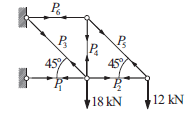


### 2a) Write the linear system for the tensions $P_i$ as equations and in matrix form
{answer}

### 2b) Solve for $P_i$ using LU decomposition and substitution.
{method, answer}

### 2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.
{answer}

## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

## 3a) Calculate the condition number of A
{answer}

In [ ]:
# prompt: Calculate the condition number of A

import numpy as np

# Define the matrix A
A = np.array([[1, 2],
              [3, 4]])

# Explanation: The condition number of a matrix is a measure of how sensitive the solution
# of a system of linear equations is to changes in the input data. A high condition number
# indicates that the matrix is ill-conditioned, meaning small changes in the input can lead
# to large changes in the output.

# Calculate the condition number
# Explanation: numpy.linalg.cond calculates the condition number of a matrix.
# By default, it calculates the 2-norm condition number.
condition_number = np.linalg.cond(A)

# Print the condition number
print("The condition number of matrix A is:", condition_number)

# Explanation: The calculated condition number provides insight into the matrix's
# sensitivity to numerical errors when solving linear systems involving this matrix.

The condition number of matrix A is: 14.933034373659268


## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}

In [ ]:
# prompt: solve 3b - comment the code

import numpy as np

# Define the matrix A from Question 3
A = np.array([[1, 2],
              [3, 4]])

# Example 1: Diagonal Preconditioner (Jacobi Preconditioner)
# P is formed by taking the diagonal elements of A
P_diag = np.diag(np.diag(A))

# Calculate the inverse of P_diag
# For a diagonal matrix, the inverse is simply the reciprocal of the diagonal elements
P_diag_inv = np.linalg.inv(P_diag)

# Calculate the preconditioned matrix P_diag_inv * A
A_preconditioned_diag = P_diag_inv @ A

# Calculate the condition number of the preconditioned matrix
condition_number_diag = np.linalg.cond(A_preconditioned_diag)

print("Condition number with Diagonal Preconditioner:", condition_number_diag)

# Example 2: Lower Triangular Preconditioner (Gauss-Seidel Preconditioner)
# P is the lower triangular part of A, including the diagonal
P_lower = np.tril(A)

# Calculate the inverse of P_lower
P_lower_inv = np.linalg.inv(P_lower)

# Calculate the preconditioned matrix P_lower_inv * A
A_preconditioned_lower = P_lower_inv @ A

# Calculate the condition number of the preconditioned matrix
condition_number_lower = np.linalg.cond(A_preconditioned_lower)

print("Condition number with Lower Triangular Preconditioner:", condition_number_lower)

# The 'Perfect' Preconditioner
# The perfect preconditioner is P = A
P_perfect = A

# Calculate the inverse of P_perfect (which is A_inv)
P_perfect_inv = np.linalg.inv(P_perfect)

# Calculate the preconditioned matrix P_perfect_inv * A
A_preconditioned_perfect = P_perfect_inv @ A

# Calculate the condition number of the preconditioned matrix
condition_number_perfect = np.linalg.cond(A_preconditioned_perfect)

print("Condition number with Perfect Preconditioner (P=A):", condition_number_perfect)

# Explanation:
# The condition number of the original matrix A was calculated in 3a.
# This code calculates the condition numbers of the matrix A after applying two different
# preconditioners: a diagonal preconditioner and a lower triangular preconditioner.
# It also calculates the condition number when using the 'perfect' preconditioner, which is A itself.
# Comparing these condition numbers to the original condition number of A demonstrates
# how preconditioners can improve the condition number of a matrix, making it easier to solve
# linear systems involving that matrix. The perfect preconditioner results in a condition number of 1,
# indicating a perfectly conditioned matrix (the identity matrix).

Condition number with Diagonal Preconditioner: 13.048362028288917
Condition number with Lower Triangular Preconditioner: 10.403882032022077
Condition number with Perfect Preconditioner (P=A): 1.0000000000000002
